# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-05 06:00:12.026117


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/4/20


,10/4/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7417845,209721,2.83
Brazil,4915289,146352,2.98
India,6623815,102685,1.55
Mexico,761665,79088,10.38
United Kingdom,505619,42440,8.39
Italy,325329,35986,11.06
Peru,821564,32609,3.97


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/4/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
44458,US,7332297,2020-10-02,208697.0,907.0,54506.0,42480.857143
44457,US,7277791,2020-10-01,207790.0,858.0,44749.0,41920.714286
44456,US,7233042,2020-09-30,206932.0,946.0,41405.0,41832.571429
44455,US,7191637,2020-09-29,205986.0,914.0,42100.0,41408.000000
44454,US,7149537,2020-09-28,205072.0,316.0,33312.0,40960.142857
44453,US,7116225,2020-09-27,204756.0,266.0,36422.0,43696.142857
44452,US,7079803,2020-09-26,204490.0,740.0,44872.0,43666.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/4/20


,10/4/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,464582,33205.0,7.15
Texas,790194,16320.0,2.07
California,832713,16147.0,1.94
New Jersey,208202,16136.0,7.75
Florida,716459,14671.0,2.05
Massachusetts,134947,9510.0,7.05
Illinois,304235,9040.0,2.97


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/4/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1539,California,826013,2020-10-02,16054.0,81.0,3808.0,3193.285714
1538,California,822205,2020-10-01,15973.0,88.0,3090.0,3241.285714
1537,California,819115,2020-09-30,15885.0,103.0,3461.0,3239.857143
1536,California,815654,2020-09-29,15782.0,149.0,2943.0,3227.000000
1535,California,812711,2020-09-28,15633.0,27.0,2821.0,3230.714286
1534,California,809890,2020-09-27,15606.0,23.0,2439.0,3388.857143
1533,California,807451,2020-09-26,15583.0,67.0,3791.0,3448.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/4/20


,10/4/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,274565,6647.0,2.42
Orange,54640,1286.0,2.35
Riverside,59991,1231.0,2.05
San Bernardino,56275,962.0,1.71
San Diego,48436,803.0,1.66
San Joaquin,20485,470.0,2.29
Sacramento,23076,430.0,1.86


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/4/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4880,Los Angeles,272653,2020-10-02,6626.0,16.0,1282.0,982.571429
4879,Los Angeles,271371,2020-10-01,6610.0,34.0,1072.0,993.857143
4878,Los Angeles,270299,2020-09-30,6576.0,25.0,1015.0,995.142857
4877,Los Angeles,269284,2020-09-29,6551.0,36.0,829.0,1021.571429
4876,Los Angeles,268455,2020-09-28,6515.0,1.0,654.0,1001.285714
4875,Los Angeles,267801,2020-09-27,6514.0,10.0,813.0,1000.571429
4874,Los Angeles,266988,2020-09-26,6504.0,16.0,1213.0,1024.428571
4873,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4872,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4871,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571



7 day new US cases as of 10/4/20


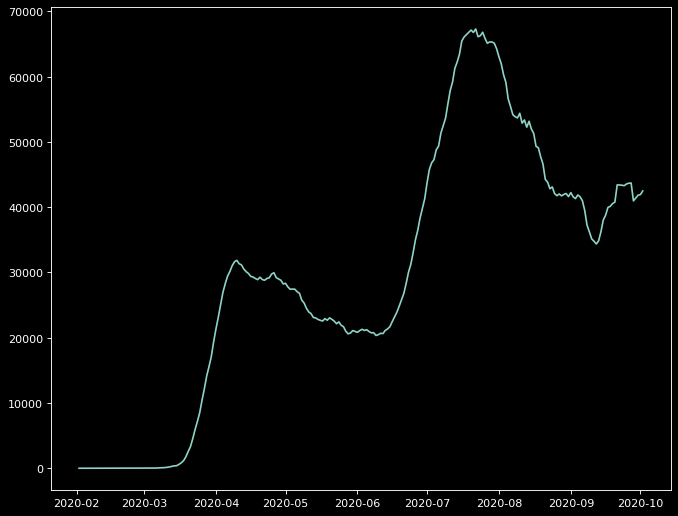

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/4/20


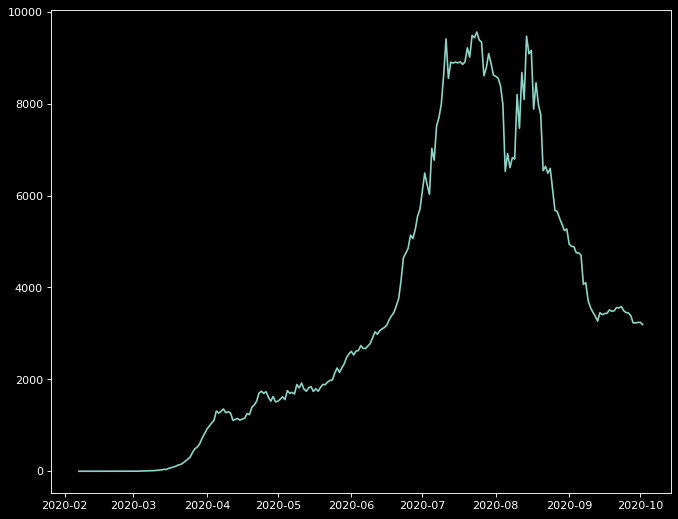

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/4/20


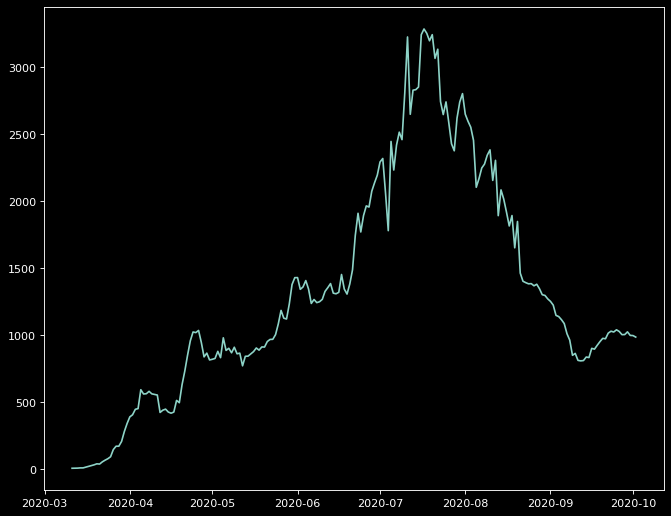

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()